Can we determine which variables are likely important for customer to churn?

This analysis will help Stakeholders to know which customers are most likely to churn and make decisions to improve the service based on the variable that affect the customer to churn.

SUMMARY OF ASSUMPTIONS:
- Binary logistic regression requires the dependent variable to be binary and same for ordinal logistic regression the dependent variable must be ordinal.
- The independent variables are not highly (multicollinearity) correlated to each other.
- Observations are selected independently.
- logistic regression assumes the linearity between independent variables and log odds.
- Logistic regression requires a large sample size.

APPROPRIATE TECHNIQUE:
- Logistic regression is an appropriate technique to analyze the binary or ordinal variables. And since my research question is trying to predict the probability of binary dependent variable with Yes/NO

DATA GOALS:
- Import Python libraries that will be used for data preparation and manipulation.
- Import dataset into Python dataframe
- Check for missing and duplicate data for nulls and remove duplicates.
- For ordinal variables with scale of 1 to 8 such as the survey responses variables, rename the variables with meaningful names and include them in the analysis.
- Drop irrelevant variables that will not be used in the regression.
- Convert categorical variables to numerical variables to be able to use them in the regression using get_dummies function.

SUMMARY STATISTICS:
- The data contains of 10,000 rows and 50 variables.
- The target variable is Churn, and the predictor variables are all variables such as some of the customer demographics information (Children, Age, Gender, Income) and some other categorical variables that represent customer preferences. Also, the analysis will include variables that represents some services can be improved and controlled by the company them such as Internet Service, Device Protection and Multiple services also will include the survey responses variables that show customer feedback in scale from 1 to 8.
- Convert all binomial variables to 1 and 0 including the dependent variable.
- Use the describe function to get some summary statistics about the data such as count, mean, Standard deviation, minimum and maximum.

STEPS TO PREPARE THE DATA:
- Import dataset into Python dataframe.
- Describe the dataframe statistics.
- Rename survey variables with more meaningful names.
- Drop variables that will not contribute to the regression analysis.
- Check for missing or duplicate data
- Convert categorical variables to numerical by replace “Yes/No” with “1/0” numerical values.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset in the form of pandas dataframe
df= pd.read_csv('churn_clean.csv')

In [3]:
#Rename survey responses column names
df.rename(columns = {'Item1':'Timely_Responses','Item2':'Timely_Fixes', 
                           'Item3':'Timely_Replacements','Item4':'Reliability', 
                           'Item5':'Options','Item6':'Respectful_responses', 
                           'Item7':'Courteous_exchange','Item8':'Active_listening'},
                inplace=True)

In [4]:
#Drop columns that will not be used
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population', 
              'Area', 'TimeZone', 'Job', 'Marital','PaymentMethod'] , axis=1)

In [5]:
#List the Dataframe Columns after update
print(df.columns)

Index(['Children', 'Age', 'Income', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses',
       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
       'Respectful_responses', 'Courteous_exchange', 'Active_listening'],
      dtype='object')


In [6]:
#Discover if any missing data
print(df.isnull().sum())

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Timely_Responses        0
Timely_Fixes            0
Timely_Replacements     0
Reliability             0
Options                 0
Respectful_responses    0
Courteous_exchange      0
Active_listening        0
dtype: int64


In [7]:
df=pd.get_dummies(df)

In [8]:
print(df.columns)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely_Responses', 'Timely_Fixes', 'Timely_Replacements',
       'Reliability', 'Options', 'Respectful_responses', 'Courteous_exchange',
       'Active_listening', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
       'Churn_No', 'Churn_Yes', 'Techie_No', 'Techie_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'Strea

In [9]:
df = df.drop(['Gender_Female', 'Gender_Nonbinary','Churn_No','Techie_No','Contract_Month-to-month', 
              'Contract_One year','Port_modem_No','Tablet_No','InternetService_Fiber Optic',
              'InternetService_None','Phone_No','Multiple_No', 'OnlineSecurity_No','OnlineBackup_No',
              'DeviceProtection_No', 'TechSupport_No','StreamingTV_No','StreamingMovies_No','PaperlessBilling_No'] , axis=1)

In [10]:
print(df.describe())

         Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email      Contacts  Yearly_equip_failure        Tenure  \
count  10000.000000  10000.000000          10000.000000  10000.000000   
mean      12.016000      0.994200              0.398000     34.526188   
std        3.025898      0.988466              0.635953     26.443063   
min        1.000000      0.000000              0.000000      1.000259   
25% 

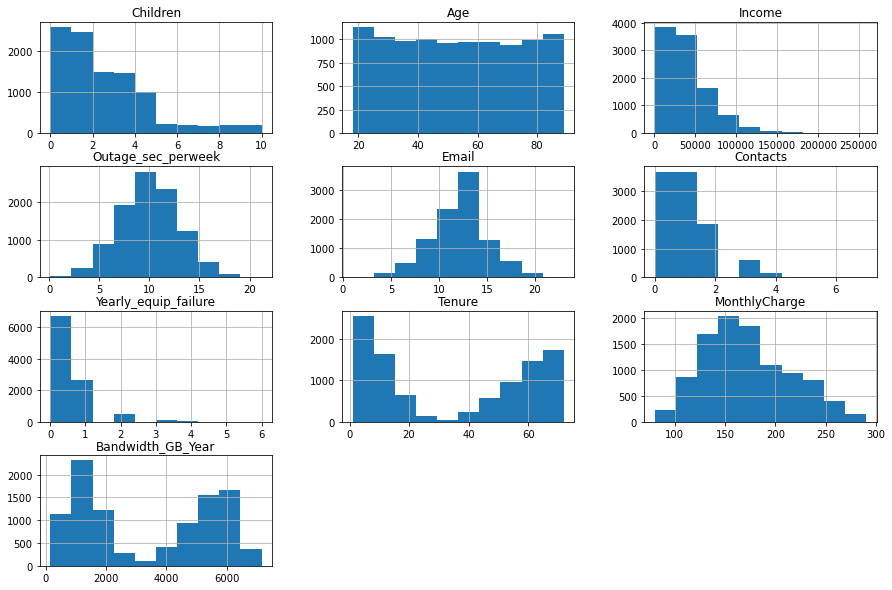

In [11]:
#histograms of contiuous variables
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
'Bandwidth_GB_Year']].hist(figsize=(15, 10))
plt.show()

In [12]:
#List the prepared dataset Columns 
print(df.columns)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely_Responses', 'Timely_Fixes', 'Timely_Replacements',
       'Reliability', 'Options', 'Respectful_responses', 'Courteous_exchange',
       'Active_listening', 'Gender_Male', 'Churn_Yes', 'Techie_Yes',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_DSL', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes'],
      dtype='object')


In [17]:
#Export prepared data set to csv
df.to_csv('prepared_data.csv')

In [18]:
df= pd.read_csv('prepared_data.csv')

In [19]:
df = df.drop(['Unnamed: 0'] , axis=1)

In [20]:
#Initial Logistic regression model
df['Intercept'] = 1
mdl = sm.Logit(df['Churn_Yes'], df[['Children','Age','Income','Outage_sec_perweek','Email','Contacts',
                                  'Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year',
                                  'Timely_Responses','Timely_Fixes','Timely_Replacements','Reliability',
                                  'Options', 'Respectful_responses', 'Courteous_exchange','Active_listening',
                                  'Gender_Male', 'Techie_Yes','Contract_Two Year', 'Port_modem_Yes', 
                                  'Tablet_Yes','InternetService_DSL', 'Phone_Yes', 'Multiple_Yes','OnlineSecurity_Yes',
                                  'OnlineBackup_Yes', 'DeviceProtection_Yes','TechSupport_Yes', 'StreamingTV_Yes',
                                  'StreamingMovies_Yes','PaperlessBilling_Yes','Intercept']]).fit()
print(mdl.summary())

Optimization terminated successfully.
         Current function value: 0.271355
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9966
Method:                           MLE   Df Model:                           33
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.5307
Time:                        10:06:22   Log-Likelihood:                -2713.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.2745      0.051     -5.338      0.000      -0.375      -0.174

JUSTIFICATION OF MODEL REDUCTION:
- Based on the above model, the result of the R-squ and the coefficients of the variables are very low.
- all variables with p-value less than 0.05 will be included in the reduced model as they can be statistically significant.
- Heatmap show the correlation between selected variables for the reduced model and the target variable.
Variable
P>|z|
Children
0.000
Age
0.000
Tenure
0.000
Bandwidth_GB_Year
0.000
Gender_Male
0.003
Techie_Yes
0.000
Contract_Two
0.000
Port_modem_Yes
0.025
InternetService_DSL
0.000
Phone_Yes
0.005
Multiple_Yes
0.000
OnlineSecurity_Yes
0.000
DeviceProtection_Yes
0.000
TechSupport_Yes
0.027
StreamingMovies_Yes
0.012

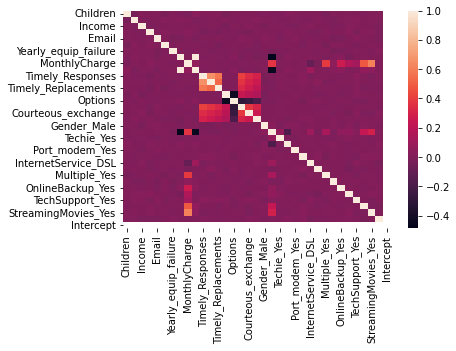

In [21]:
sns.heatmap(df.corr(),annot = False)
plt.show()

In [22]:
#Reduced Logistic Regression Model
df['Intercept'] = 1
mdl_reduced = sm.Logit(df['Churn_Yes'], df[['Children','Age','Tenure','Bandwidth_GB_Year','Gender_Male',
                                    'Techie_Yes','Contract_Two Year', 'Port_modem_Yes','InternetService_DSL',
                                    'Phone_Yes', 'Multiple_Yes','OnlineSecurity_Yes','DeviceProtection_Yes',
                                    'TechSupport_Yes','StreamingMovies_Yes','Intercept']]).fit()
print(mdl_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.272580
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.5286
Time:                        10:07:27   Log-Likelihood:                -2725.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.2939      0.019    -15.511      0.000      -0.331      -0.257

The first logistic regression model with 33 independent variables shows R-squ value = 0.5307 (53% of variance) and after reduced the regression model to use 15 independent variables the R-squ value = 0.5286 (52.8% of variance) which is very close to the initial R-squ value even after reduced the number of independent variables to almost the half.

- Confusion Matrix with variables from the reduced model

In [24]:
df_cm= pd.read_csv('prepared_data.csv')

In [25]:
X = df_cm[['Children','Age','Tenure','Bandwidth_GB_Year','Gender_Male',
                                    'Techie_Yes','Contract_Two Year', 'Port_modem_Yes','InternetService_DSL',
                                    'Phone_Yes', 'Multiple_Yes','OnlineSecurity_Yes','DeviceProtection_Yes',
                                    'TechSupport_Yes','StreamingMovies_Yes']]
y = df_cm['Churn_Yes']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear', random_state=0)
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [28]:
y_pred = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1376  110]
 [ 158  356]]


<AxesSubplot:>

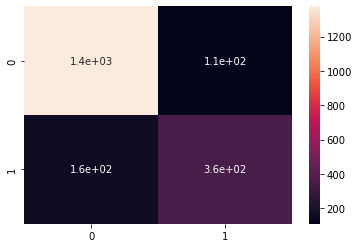

In [30]:
sns.heatmap(cm, annot= True)

In [31]:
logmodel.score(X_test, y_test)

0.866

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1486
           1       0.76      0.69      0.73       514

    accuracy                           0.87      2000
   macro avg       0.83      0.81      0.82      2000
weighted avg       0.86      0.87      0.86      2000



RESULTS:
- The regression equation for the reduced model
y = -4.3230 – 0.2939 * Children + 0.0344 * Age + 0.8200 * Techie_Yes – 2.2628 * Contract_Two Year + 0.1544 * Port_modem_Yes – 2.9596* InternetService_DSL - 0.3399 * Phone_Yes + 0.6240 * Multiple_Yes - 0.8425 * OnlineSecurity_Yes - 0.5401 * DeviceProtection_Yes + 0.1967 * TechSupport_Yes - 0.8883 * Tenure - 0.3938 * Gender_Male + 0.0097 * Bandwidth_GB_Year + 0.7496 * StreamingMovies_Yes
- The P-value for all the variables included in the analysis are less than 0.05 and are statistically significant.
- The limitation of the analysis is that the sample data isn’t enough, and more data and other variables need to be collected.